## Generalization

Model Generalization - Performance of model on unseen ***test*** data. 

For any supervised learning problem, our task is to learn a model/hypothesis parameterized by $\theta$, $h_{\theta}$ using the training examples $\{(x^{(i)}, y^{(i)})\}_{i = 1}^n$. We do so by minimizing some cost/loss function $J_{\theta}$. For e.g. in the case of OLS regression - 
$$
J(\theta) = \frac{1}{n}\Sigma_{i=1}^n(y^{(i)} - h_{\theta}(x^{(i)}))^2
$$
The above expression is called the training loss. But it is also important to measure the performance on test (unseen) samples as well to see how well our model generalizes. This is called the **test loss**. $\forall$ unseen data $(x,y) \sim D$, for OLS regression, test loss is the expected value of the squared loss over the samples $(x,y)$ coming from the distribution $D$, i.e. - 
$$
L(\theta) = E_{(x,y) \sim D}[(y - h_{\theta}(x))^2]
$$
As the training procedure has not used the test data, the loss values are not necessarily similar and its known as the generalization gap.

#### Overfitting - 
When the train loss is small but the test loss is higher. Model doesn't generalize well.
#### Underfitting - 
When the train loss itself is very large. Model isn't fitted well by training examples.

Let's see how the test error is influenced by the learning procedure and model parameterization.

### Bias-variance tradeoff

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

np.random.seed(0)

In [106]:
def function(x):
    return 2*x**2 + 2*x - 1

MIN_X = -1
MAX_X = 1
NUM_SAMPLES = 10

underlying_function = np.vectorize(function)
X = np.linspace(MIN_X, MAX_X, 1000)
h = underlying_function(X)

def generate_data(n_samples=100):
    X = np.random.uniform(MIN_X, MAX_X, size=(n_samples, 1))
    h = underlying_function(X)
    y = h + np.random.normal(loc=0, scale=1, size=(n_samples, 1))
    return X, y

def plot_data(X, y):
    plt.scatter(X, y, marker = 'x', color = 'r', label = 'data')
    plt.plot(np.linspace(MIN_X, MAX_X, 1000), h, color = 'b', label = 'underlying function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

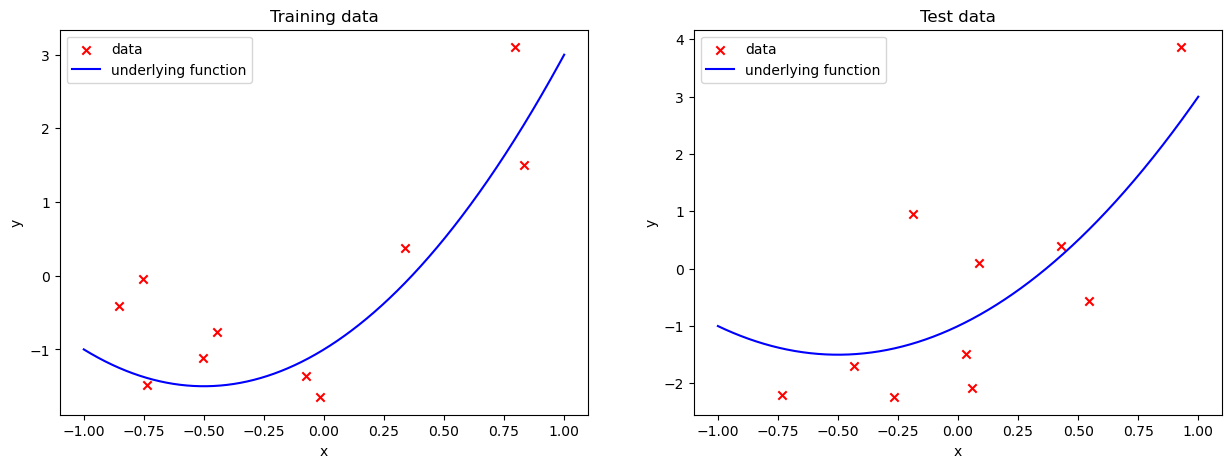

In [110]:
train_x, train_y = generate_data(NUM_SAMPLES)
test_x, test_y = generate_data(NUM_SAMPLES)

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].scatter(train_x, train_y, marker = 'x', color = 'r', label = 'data')
ax[0].plot(np.linspace(MIN_X, MAX_X, 1000), h, color = 'b', label = 'underlying function')
ax[0].set_title('Training data')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

ax[1].scatter(test_x, test_y, marker = 'x', color = 'r', label = 'data')
ax[1].plot(np.linspace(MIN_X, MAX_X, 1000), h, color = 'b', label = 'underlying function')
ax[1].set_title('Test data')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.show()

We have the training and the test data coming from the same underlying distribution. <br>
$h^{*}(x) = 2x^2 + 2x - 1$ is the underlying quadratic function. <br>
$y^{(i)} = h^{*}(x^{(i)}) + \xi^{(i)}$ is the generated data after adding the random noise $\xi \sim N(0, 1)$

Our goal is to predict the underlying function $h^{*}(.)$

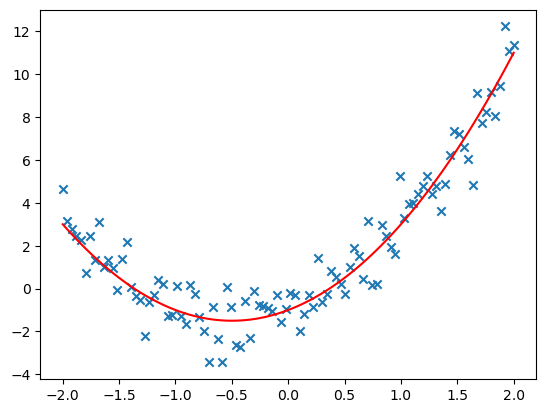

In [76]:
x = np.linspace(-2, 2, 100)
h = function(x)
eps = np.random.normal(0, 1, 100)
y = h + eps
plt.scatter(x, y, marker='x', label='data')
plt.plot(x, h, color='r', label='underlying function')

y.shape =(10,) x.shape =(10,) eps.shape =(10,) h.shape =(10,)


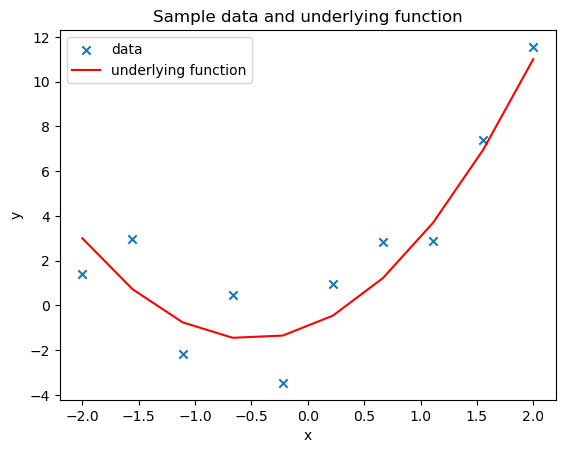

In [77]:
x = np.linspace(-2, 2 , 10)
h = function(x)
eps = np.random.normal(0, 1, 10)
y = h + eps

print(f'{y.shape =} {x.shape =} {eps.shape =} {h.shape =}')

plt.scatter(x, y, marker='x', label='data')
plt.plot(x, h, color='r', label='underlying function')
plt.legend()
plt.title('Sample data and underlying function')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


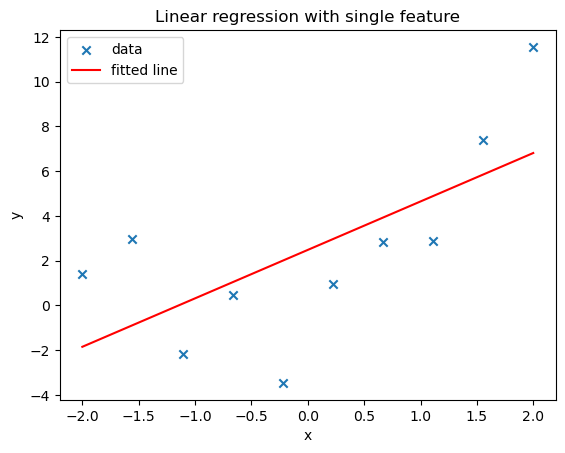

In [78]:
# fit a line to the data, using sklearn
# underfit
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

# plot the line 
plt.scatter(x, y, marker='x', label='data')
h = function(x)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='r', label='fitted line')
plt.title('Linear regression with single feature')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

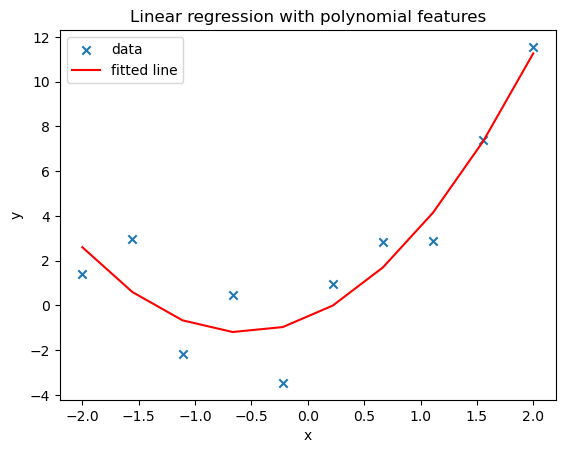

In [79]:
# linear regression with polynomial features
x_2 = x**2
x_poly = np.concatenate((x, x_2), axis=1)
model = LinearRegression()
model.fit(x_poly, y)

# plot the line
plt.scatter(x, y, marker='x', label='data')
h = function(x)
plt.plot(x, model.predict(x_poly), color='r', label='fitted line')
plt.title('Linear regression with polynomial features')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()


![](https://i.imgflip.com/yp6kp.jpg?a472560)

In [80]:
# print the coefficients
print(f'{model.coef_ =}')
print(f'{model.intercept_ =}')

model.coef_ =array([[2.1639386 , 1.87702555]])
model.intercept_ =array([-0.57813192])


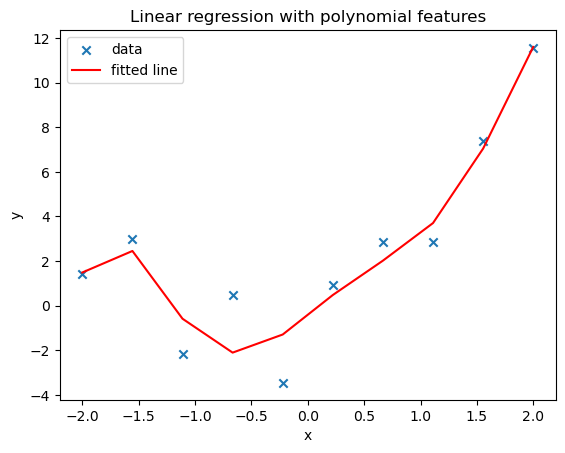

In [81]:
# overfit, fit a polynomial of degree 7
x_2 = x**2
x_3 = x**3
x_4 = x**4
x_5 = x**5
x_6 = x**6
x_7 = x**7
x_poly = np.concatenate((x, x_2, x_3, x_4, x_5, x_6, x_7), axis=1)
model = LinearRegression()
model.fit(x_poly, y)

# plot the line
plt.scatter(x, y, marker='x', label='data')
h = function(x)
plt.plot(x, model.predict(x_poly), color='r', label='fitted line')
plt.title('Linear regression with polynomial features')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')
plt.show()

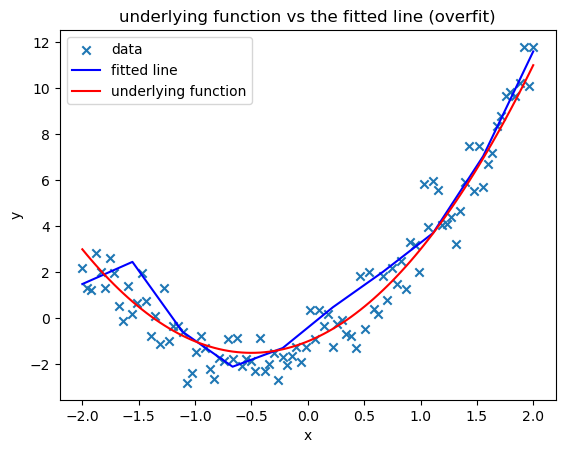

In [82]:
# show that it overfits 
x = np.linspace(-2, 2, 100)
h = function(x)
eps = np.random.normal(0, 1, 100)
y = h + eps
plt.scatter(x, y, marker='x', label='data')
plt.plot(x_poly[:,0], model.predict(x_poly), color='b', label='fitted line')
plt.plot(x, h, color='r', label='underlying function')
plt.legend()
plt.title('underlying function vs the fitted line (overfit)')
plt.ylabel('y')
plt.xlabel('x')
plt.show()
